In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import requests
# import gmaps
# import os

Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]

# # Import API key
# from keys import g_key
# gmaps.configure(api_key=g_key)

# Mission: 
# State population vs air quality (CO2 emissions) - Asia 
# Include percentages/fractions for population & emissions
# Line graph of 5 states 
# Box and whiskers for population/emissions outliers

capitals_csv = pd.read_csv('Census Data/us-capitals.csv', usecols=['abbrev', 'state'])
population_csv = pd.read_csv('Census Data/state_population_data.csv', usecols=['State', 'Population'])
population_csv.columns = map(str.lower, population_csv.columns)
population_csv.dropna(axis="rows", how="any", inplace=True)
clean_df = capitals_csv.merge(population_csv, on='state')
states = clean_df.loc[clean_df["state"].isin(['Ohio', 'Pennsylvania', 'Texas', 'Washington', 'Vermont'])]
states

,abbrev,state,population
34,OH,Ohio,11613423
37,PA,Pennsylvania,12802503
42,TX,Texas,27469114
44,VT,Vermont,626042
46,WA,Washington,7170351


In [101]:
# Here, I combined two csv's to save on a bit of time
# I knew I'd need the abbreviations for each state 
# That way I could merge with the emissions data later 
# First I wanted a clean chart for a population bar graph

In [102]:
emissions_csv = pd.read_csv('input_data/emissions.csv')
emissions = emissions_csv.rename(columns={'State': 'abbrev'})
state_emissions = emissions.loc[emissions['abbrev'].isin(['CA', 'TX', 'FL', 'NY', 'IL'])]
state_emissions

,abbrev,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
4,CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,360.913489
9,FL,237.796669,223.440307,241.444374,228.354541,222.060114,221.129496,227.026655,231.401212,229.211894,227.957278
13,IL,240.790418,225.637906,230.777009,229.511123,216.835870,230.259870,233.295335,215.876969,204.059822,202.401899
32,NY,186.854338,171.098055,172.902262,163.116861,159.462054,161.097763,168.874569,166.811529,162.789066,157.731884
43,TX,643.698700,611.110086,648.818958,666.708188,662.002423,696.845756,693.485215,693.100945,695.363753,710.994283


In [103]:
# x_axis = np.arange(len(clean_df))
# tick_locations = [value for value in x_axis]
# plt.figure(figsize=(50,8))
# plt.bar(x_axis, clean_df["population"], color='orange', alpha=0.75, align="center")
# plt.xticks(tick_locations, clean_df["abbrev"], fontsize='30')
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(clean_df["population"]))
# plt.tight_layout()
# plt.title("Population Per State")
# plt.xlabel("State")
# plt.ylabel("People (per million)")
# matplotlib.rcParams.update({'font.size': 40})
# plt.show()

# California has a population of 39144818 

In [104]:
# # I'm curious to see the averages for the emissions data over each year
# # I would also like to plot it by state...

# emissions['total'] = emissions.sum(axis=1)
# ttl_emissions = emissions.drop(emissions.index[7])
# ttl_emissions

# # For some reason DC was giving me errors so I dropped it from both datasets

# x_axis = np.arange(len(ttl_emissions))
# tick_locations = [value for value in x_axis]
# plt.figure(figsize=(50,8))
# plt.bar(x_axis, ttl_emissions["total"], color='red', alpha=0.75, align="center")
# plt.xticks(tick_locations, ttl_emissions["abbrev"], fontsize='30')
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(ttl_emissions["total"]))
# plt.tight_layout()
# plt.title("Total Per State")
# plt.xlabel("State")
# plt.ylabel("Emissions (2007-2017)")
# matplotlib.rcParams.update({'font.size': 40})
# plt.show()

# So there are quite a few states that threw me for a loop 
# I expected California to be the highest poluter since it has the highest population, but Texas is...
# States like Louisiana, Indiana, and West Virginia saw higher emissions rates despite their small populations

In [105]:
# I had to make another column to match the data limits for this bar plot
# clean_df['per 10'] = round((clean_df['population'])/10000, 2)

In [106]:
# I am trying to make a grouped bar chart to compare both to one another
# The plot is too narrow

# labels = ttl_emissions['abbrev']
# bars1 = ttl_emissions['total']
# bars2 = clean_df['per 10']

# x = np.arange(len(labels))  # the label locations
# width = 0.5  # the width of the bars


# fig, ax = plt.subplots(figsize=(80,30))
# rects1 = ax.bar(x - width/2, bars1, width, label='Emissions', color='purple', alpha=0.50, align="center", ec="black")
# rects2 = ax.bar(x + width/2, bars2, width, label='Population', color='orange', alpha=0.50, align="center", ec="black")

# plt.xlim(-0.75, len(x))
# plt.ylim(0, max(ttl_emissions["total"]))
# plt.tight_layout()

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('10yr Emissions Per State')
# ax.set_title('Population V Emissions')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# tick_locations = [x for value in x_axis]
# ax.legend(loc="upper left", fontsize=80)


# plt.savefig(f"output/population_v_emissions.png")
# plt.show()


In [107]:
# I basically made two separate graphs to show population and emissions
# Then combined them to show how all 50 states measured up to one another

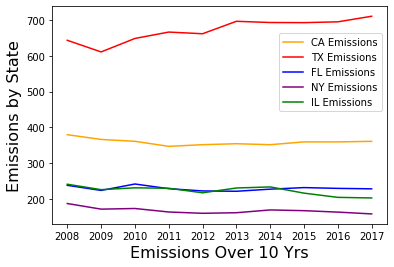

In [201]:
# Now I would like to narrow this down to my five highest population cities
# And show whether the emissions are higher because the population is higher


# These are the emissions rates over 10 years for those five states
all_df = pd.merge(state_emissions, clean_df, on='abbrev', how='outer')
five_st_emissions = all_df.set_index('abbrev')
cl_st_emissions = five_st_emissions.drop(['state', 'population'], axis=1)
cl_st_emissions.dropna(axis="rows", how="any", inplace=True)

ca_st_emissions = cl_st_emissions.loc['CA']
tx_st_emissions = cl_st_emissions.loc['TX']
fl_st_emissions = cl_st_emissions.loc['FL']
ny_st_emissions = cl_st_emissions.loc['NY']
il_emissions = cl_st_emissions.loc['IL']


# y_values = cl_st_emissions['avg emissions']

# Setting the index to abbrev and isolating the years to use as keys
five_emissions = state_emissions.set_index('abbrev')
years = five_emissions.keys()
years

# # Insert line plot for top 5 population states
line1, = plt.plot(years, ca_st_emissions, color="orange", label="CA Emissions" )
line2, = plt.plot(years, tx_st_emissions, color="red",label='TX Emissions')
line3, = plt.plot(years, fl_st_emissions, color="blue",label='FL Emissions')
line4, = plt.plot(years, ny_st_emissions, color="purple",label='NY Emissions')
line5, = plt.plot(years, il_emissions, color="green",label='IL Emissions')

plt.xlabel('Emissions Over 10 Yrs', fontsize=16)
plt.ylabel('Emissions by State', fontsize=16)

plt.legend(bbox_to_anchor=(1, .9))

plt.savefig(f"output/five_highest_pop_emissions.png")

plt.show()

In [ ]:
# THERE IS NO CORRELATION! 
# This chart shows that population does not matter!

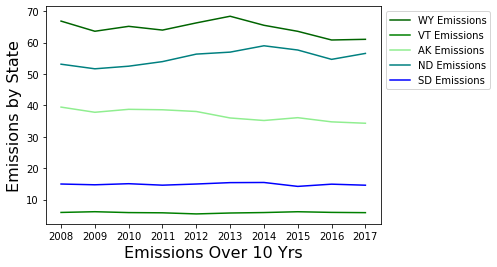

In [207]:
smallest_five = clean_df.nsmallest(5, 'population')
smallest_df = pd.merge(smallest_five, emissions, on='abbrev', how='outer')
smallest_five_emissions = smallest_df.set_index('abbrev')
smallest_five_emissions.dropna(axis="rows", how="any", inplace=True)
sm_st_emissions = smallest_five_emissions.drop(['state', 'population'], axis=1)


wy_st_emissions = sm_st_emissions.loc['WY']
vt_st_emissions = sm_st_emissions.loc['VT']
ak_st_emissions = sm_st_emissions.loc['AK']
nd_st_emissions = sm_st_emissions.loc['ND']
sd_emissions = sm_st_emissions.loc['SD']

line6, = plt.plot(years, wy_st_emissions, color="darkgreen", label="WY Emissions" )
line7, = plt.plot(years, vt_st_emissions, color="green",label='VT Emissions')
line8, = plt.plot(years, ak_st_emissions, color="lightgreen",label='AK Emissions')
line9, = plt.plot(years, nd_st_emissions, color="teal",label='ND Emissions')
line10, = plt.plot(years, sd_emissions, color="blue",label='SD Emissions')

plt.xlabel('Emissions Over 10 Yrs', fontsize=16)
plt.ylabel('Emissions by State', fontsize=16)

plt.legend(bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
# Very little emissions output from the smaller states, as expected.